In [93]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from scipy import stats
import pylab
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
#loading dataset
df=pd.read_csv('C:\\Users\\home\\Akshitha\\PYTHON-aks\\Machine Learning\\DataSets\\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Data Exploration
#No. of rows and columns in the data
df.shape

(1599, 12)

In [4]:
#columns in the dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#checking for the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#distribution of values of quality of wine
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
#Basic info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#correlation between features
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


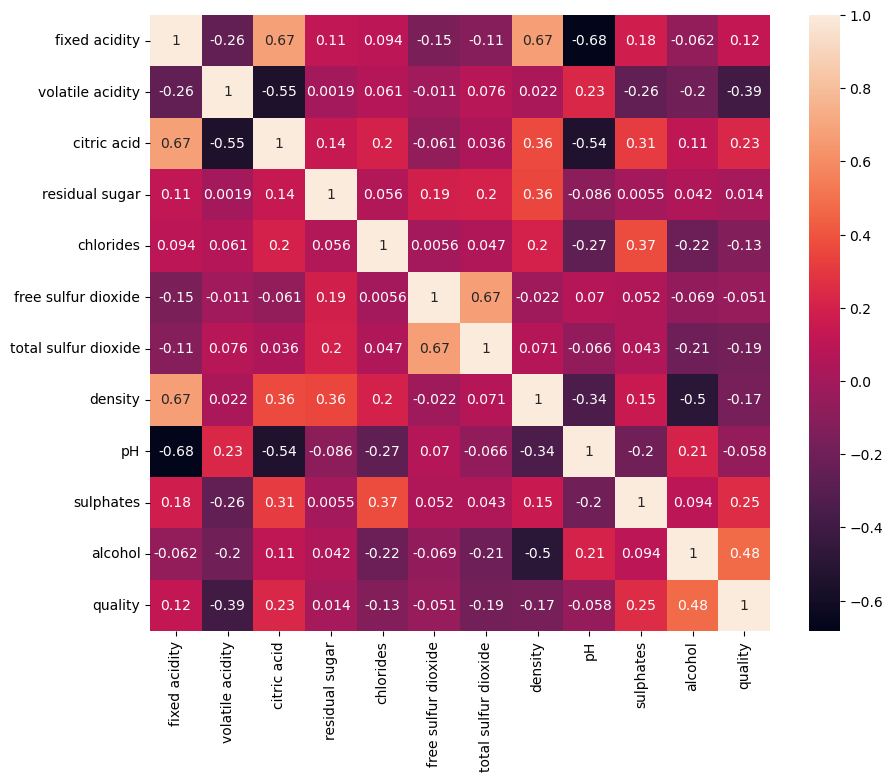

In [9]:
#correlation represented using a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

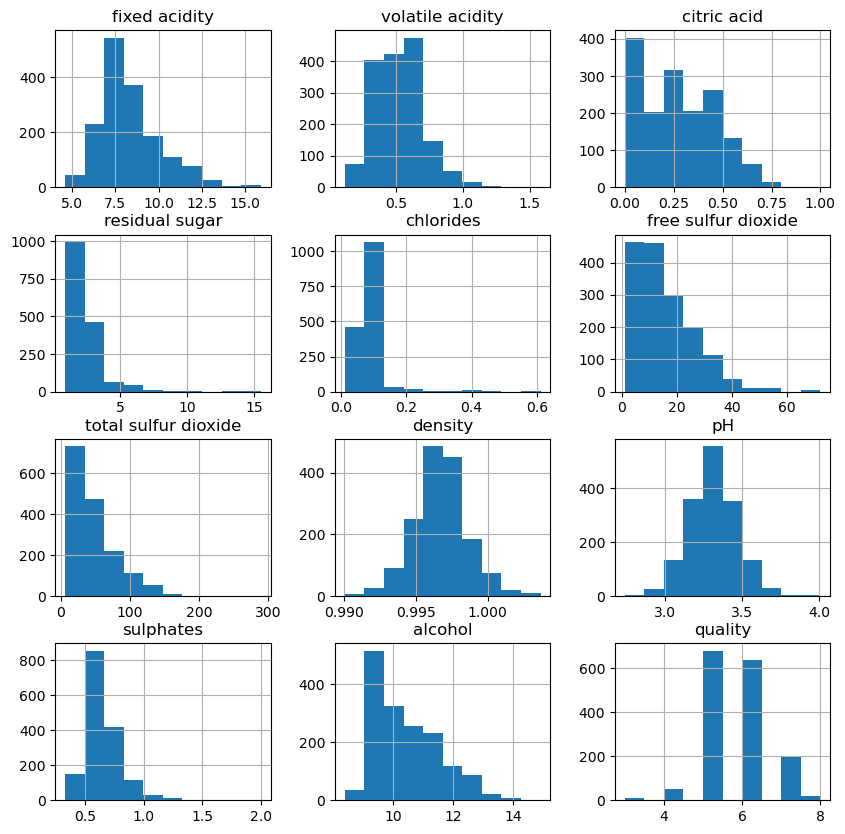

In [10]:
#histograms of features
df.hist(figsize=(10,10))
plt.show()

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

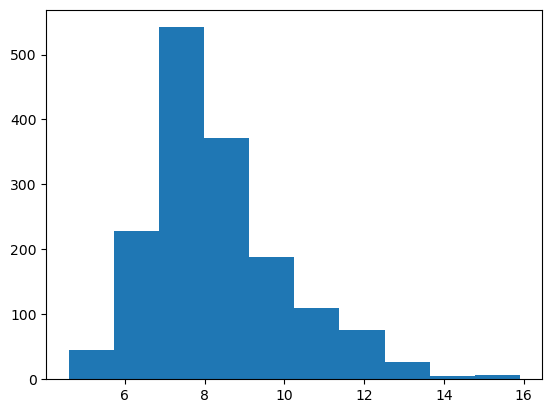

In [11]:
#Histogram of fixed acidity feature
plt.hist(df['fixed acidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29040af5630>,
 'caps': [<matplotlib.lines.Line2D at 0x29040af5a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040af5390>],
 'medians': [<matplotlib.lines.Line2D at 0x29040af5f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040af6230>],
 'means': []}

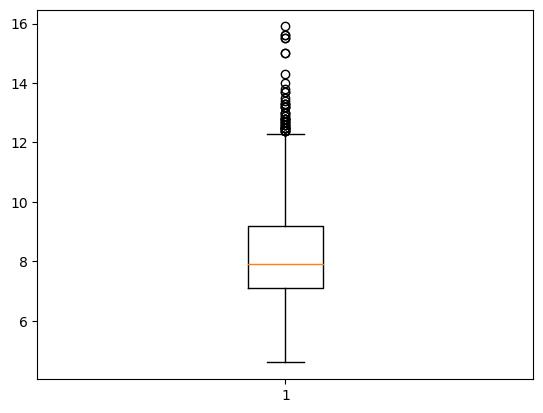

In [12]:
#checking for outliers in fixed acidity column
plt.boxplot(df["fixed acidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29040b6c610>,
 'caps': [<matplotlib.lines.Line2D at 0x29040b6cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040b6c370>],
 'medians': [<matplotlib.lines.Line2D at 0x29040b6d090>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040b6d330>],
 'means': []}

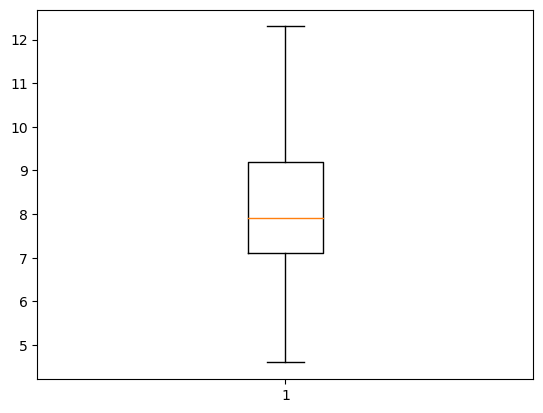

In [13]:
#winsorizing to handle outliers in fixed acidity column
winsorize(df["fixed acidity"],limits=[0,0.031],inplace=True)
plt.boxplot(df["fixed acidity"])

(array([ 23.,  64., 225., 360., 323., 208., 120., 120.,  60.,  96.]),
 array([ 4.6 ,  5.37,  6.14,  6.91,  7.68,  8.45,  9.22,  9.99, 10.76,
        11.53, 12.3 ]),
 <BarContainer object of 10 artists>)

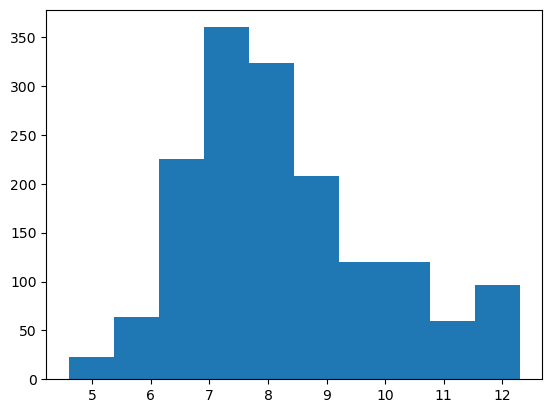

In [14]:
#Histogram of fixed acidity feature after winsorizing
plt.hist(df['fixed acidity'])

(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

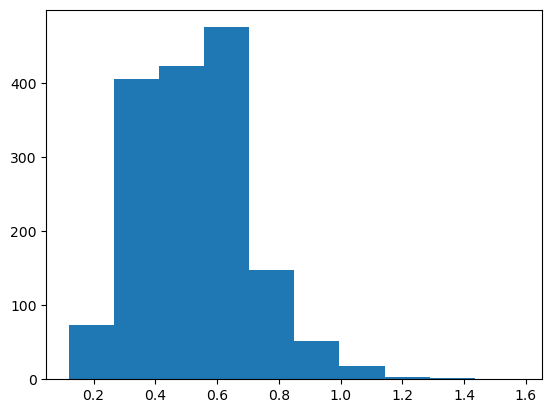

In [15]:
#Histogram for volatile acidity
plt.hist(df["volatile acidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29040ce6860>,
 'caps': [<matplotlib.lines.Line2D at 0x29040ce6da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040ce65c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29040ce72e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040ce7580>],
 'means': []}

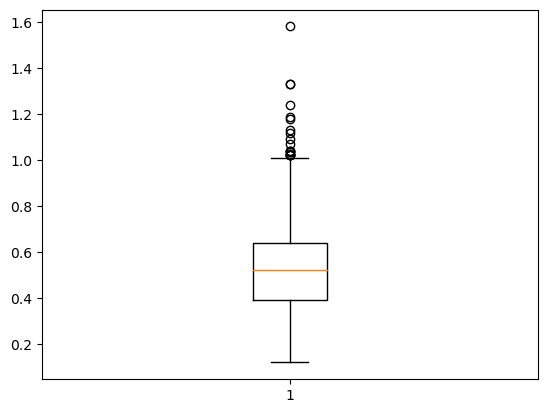

In [16]:
#checking for outliers in volatile acidity column
plt.boxplot(df["volatile acidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29040d5ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x29040d5f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040d5e9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29040d5f490>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040d5f730>],
 'means': []}

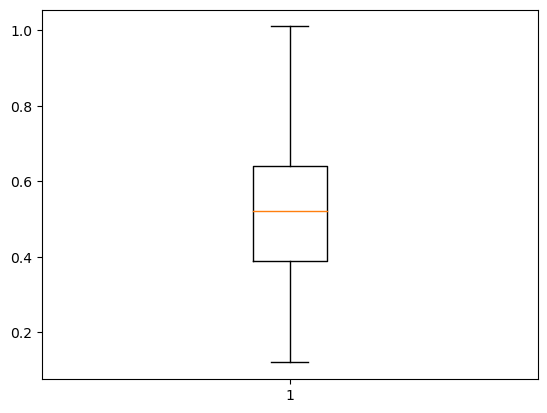

In [17]:
#winsorizing to handle outliers in volatile acidity column
winsorize(df["volatile acidity"],limits=[0,0.012],inplace=True)
plt.boxplot(df["volatile acidity"])

(array([ 20., 107., 244., 283., 281., 316., 185.,  75.,  50.,  38.]),
 array([0.12 , 0.209, 0.298, 0.387, 0.476, 0.565, 0.654, 0.743, 0.832,
        0.921, 1.01 ]),
 <BarContainer object of 10 artists>)

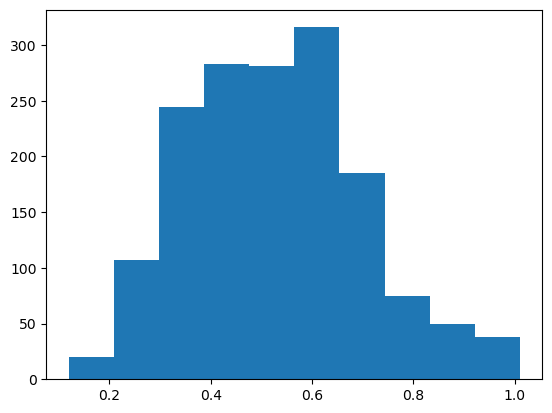

In [18]:
#Histogram for volatile acidity after winsorizing
plt.hist(df["volatile acidity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2904120c220>,
 'caps': [<matplotlib.lines.Line2D at 0x2904120c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x290411e3f40>],
 'medians': [<matplotlib.lines.Line2D at 0x2904120c700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2904120c9a0>],
 'means': []}

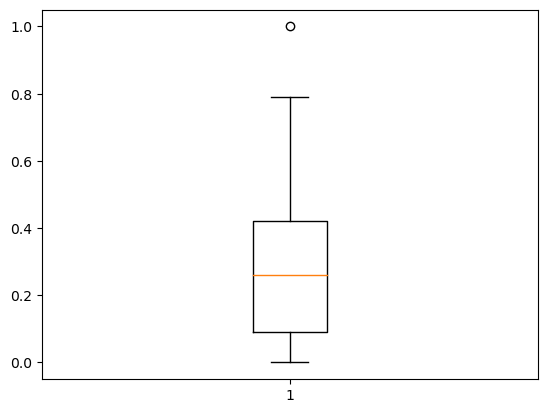

In [19]:
#checking for outliers in citric acid column
plt.boxplot(df["citric acid"])

In [20]:
#Removing a few extreme outliers in citric acid column
arr=[]
for i, row in df.iterrows():
    if row["citric acid"]>0.8:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape



(1598, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2904126d150>,
 'caps': [<matplotlib.lines.Line2D at 0x2904126d690>,
 'boxes': [<matplotlib.lines.Line2D at 0x2904126ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2904126dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2904126de70>],
 'means': []}

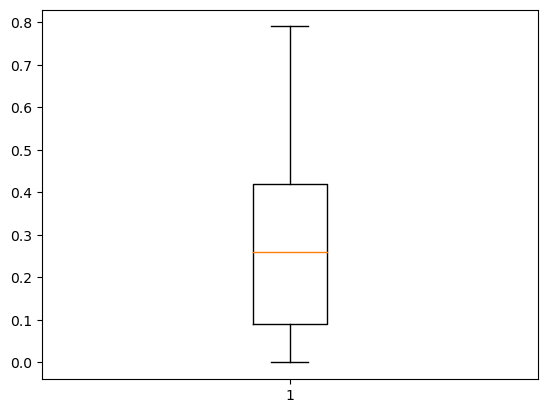

In [21]:
#checking for outliers in citric acid column
plt.boxplot(df["citric acid"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29041300550>,
 'caps': [<matplotlib.lines.Line2D at 0x290412d5840>,
 'boxes': [<matplotlib.lines.Line2D at 0x290413002b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29041300be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29041300e80>],
 'means': []}

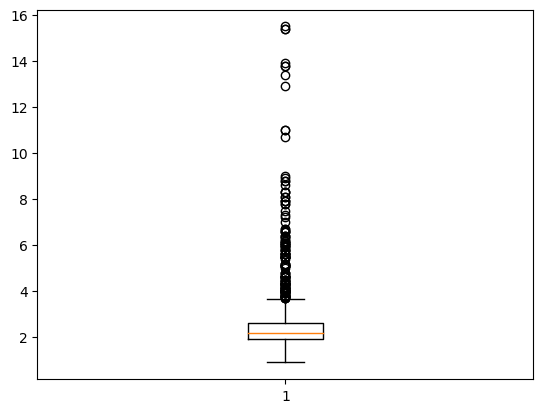

In [22]:
#checking for outliers in residual sugar column
plt.boxplot(df["residual sugar"])

In [23]:
#Removing a few extreme outliers in residual sugar column
arr=[]
for i, row in df.iterrows():
    if row["residual sugar"]>10:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape

(1587, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2904245f3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2904245f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2904245f100>],
 'medians': [<matplotlib.lines.Line2D at 0x2904245fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2904245ffa0>],
 'means': []}

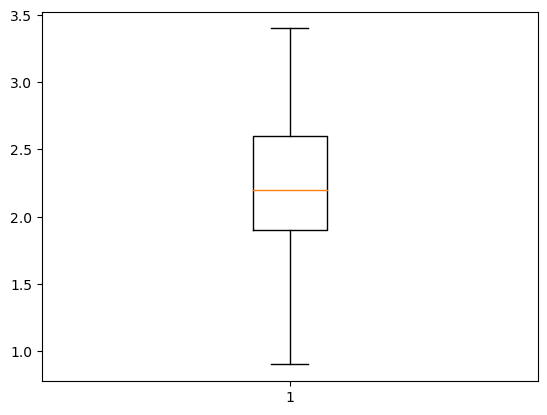

In [24]:
#winsorizing to handle outliers in residual sugar column
winsorize(df['residual sugar'],limits=[0,0.1],inplace=True)
plt.boxplot(df['residual sugar'])

{'whiskers': [<matplotlib.lines.Line2D at 0x290424dcee0>,
 'caps': [<matplotlib.lines.Line2D at 0x290424dd420>,
 'boxes': [<matplotlib.lines.Line2D at 0x290424dcc40>],
 'medians': [<matplotlib.lines.Line2D at 0x29042438a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x29041302410>],
 'means': []}

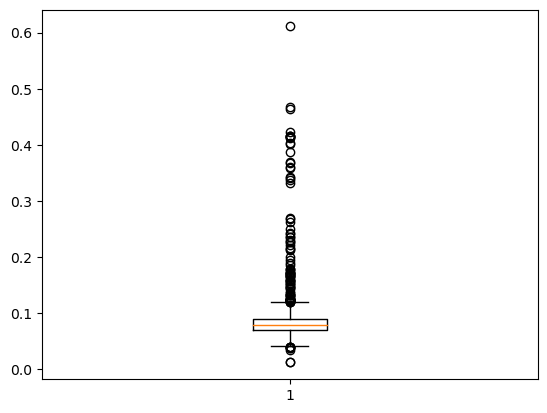

In [25]:
#checking for outliers in chlorides column
plt.boxplot(df["chlorides"])

In [26]:
#Removing a few extreme outliers in chlorides column
arr=[]
for i, row in df.iterrows():
    if row["chlorides"]>0.45:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape


(1584, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x29040d18250>,
 'caps': [<matplotlib.lines.Line2D at 0x29040d19ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040d182e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29040d1a980>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040d1b520>],
 'means': []}

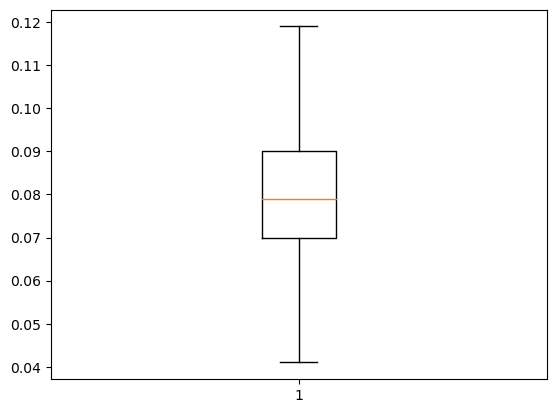

In [27]:
#winsorizing to handle outliers in chlorides column
winsorize(df["chlorides"],limits=[0.006,0.06],inplace=True)
plt.boxplot(df["chlorides"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903eb4f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2903eb4c5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903eb4f670>],
 'medians': [<matplotlib.lines.Line2D at 0x2903eb4d000>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f864b80>],
 'means': []}

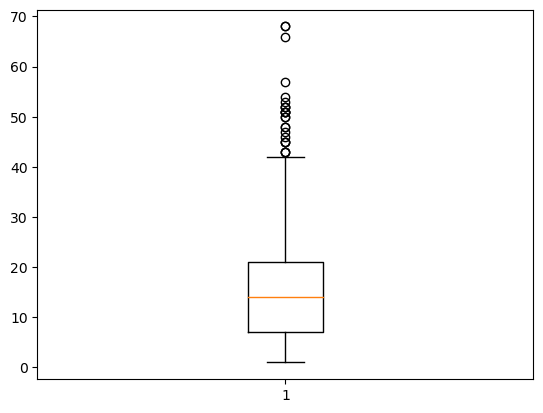

In [28]:
#checking for outliers in free sulfur dioxide column
plt.boxplot(df["free sulfur dioxide"])

In [29]:
#Removing a few extreme outliers in free sulfur dioxide column
arr=[]
for i, row in df.iterrows():
    if row["free sulfur dioxide"]>60:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape


(1581, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2903eae6020>,
 'caps': [<matplotlib.lines.Line2D at 0x2903eae5db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903eae6c20>],
 'medians': [<matplotlib.lines.Line2D at 0x2903eae5bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903eae4910>],
 'means': []}

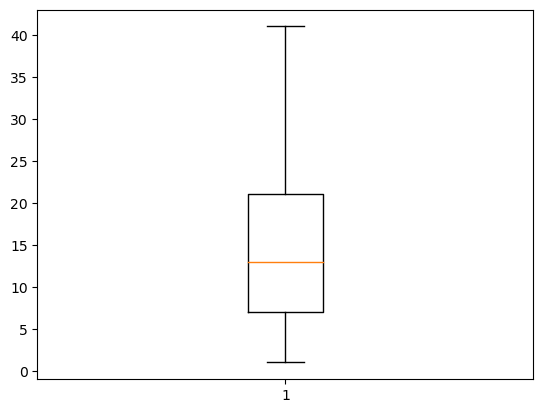

In [30]:
#winsorizing to handle outliers in chlorides column
winsorize(df["free sulfur dioxide"],limits=[0,0.02],inplace=True)
plt.boxplot(df["free sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903e911ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x2903f7d4ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903e913e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f7d55d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f7d6080>],
 'means': []}

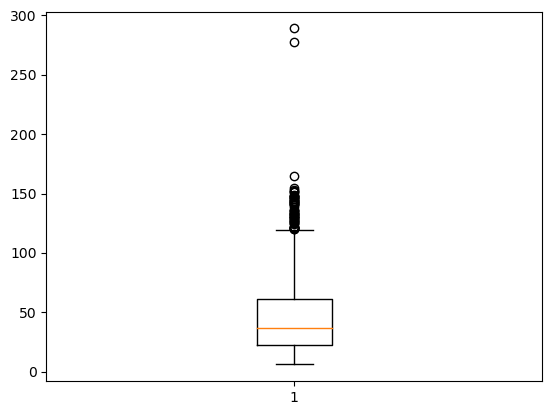

In [31]:
#checking for outliers in total sulfur dioxide column
plt.boxplot(df["total sulfur dioxide"])

In [32]:
#Removing a few extreme outliers in total sulfur dioxide column
arr=[]
for i, row in df.iterrows():
    if row["total sulfur dioxide"]>250:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape

(1579, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2903ea342b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2903ea34a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903ea343d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f831c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f833160>],
 'means': []}

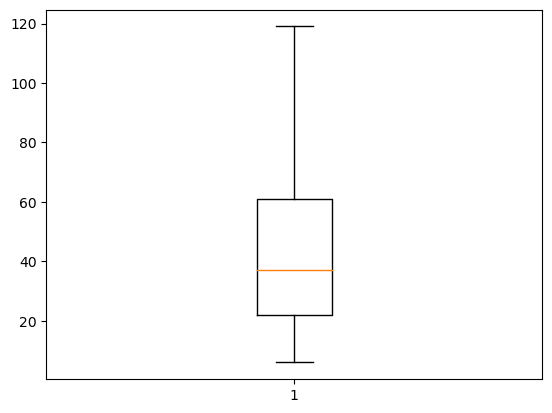

In [33]:
#winsorizing to handle outliers in total sulfur dioxide column
winsorize(df["total sulfur dioxide"],limits=[0,0.04],inplace=True)
plt.boxplot(df["total sulfur dioxide"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903f7995d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2903f799960>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903f79a410>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f799fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f79a4a0>],
 'means': []}

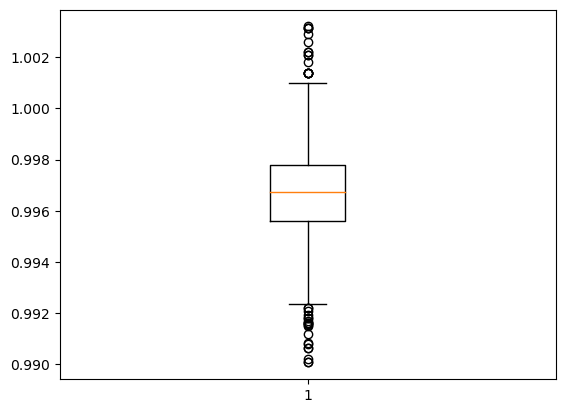

In [34]:
#checking for outliers in total sulfur dioxide column
plt.boxplot(df["density"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903f75f640>,
 'caps': [<matplotlib.lines.Line2D at 0x2903f75ece0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903f75ff70>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f75cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f75c460>],
 'means': []}

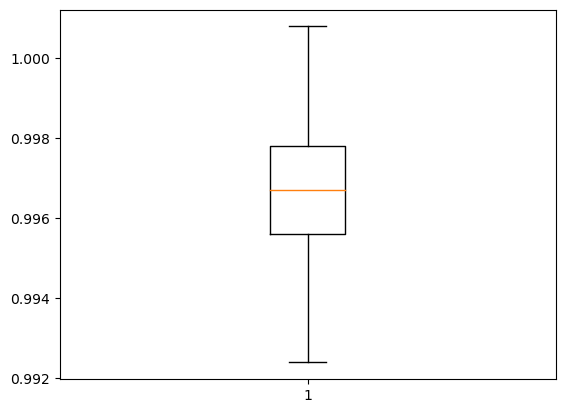

In [35]:
#winsorizing to handle outliers in density column
winsorize(df["density"],limits=[0.015,0.015],inplace=True)
plt.boxplot(df["density"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903f714160>,
 'caps': [<matplotlib.lines.Line2D at 0x2903f745bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903f747550>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f746470>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f746920>],
 'means': []}

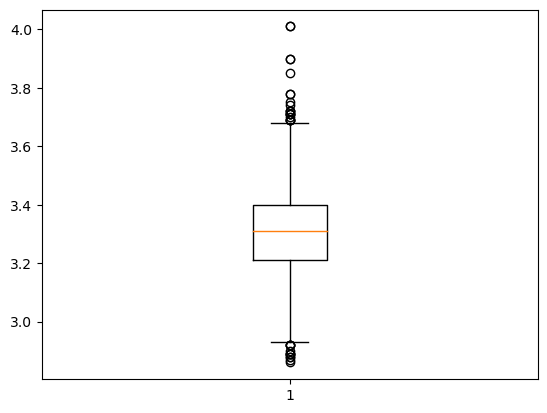

In [36]:
#checking for outliers in pH column
plt.boxplot(df["pH"])

In [37]:
#Removing a few extreme outliers in pH column
arr=[]
for i, row in df.iterrows():
    if row["pH"]>3.8:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape

(1574, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2903ec6aa70>,
 'caps': [<matplotlib.lines.Line2D at 0x2903ec6b1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903ec6aa40>],
 'medians': [<matplotlib.lines.Line2D at 0x2903ec6b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903ec69180>],
 'means': []}

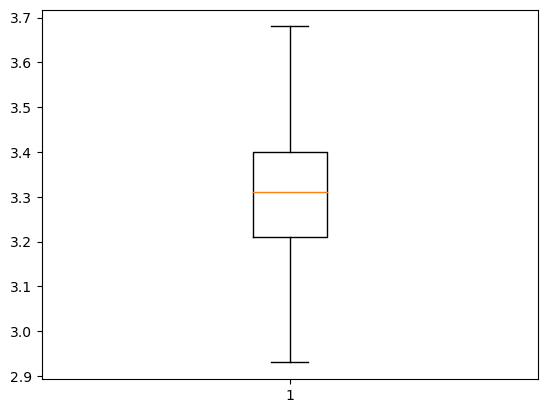

In [38]:
#winsorizing to handle outliers in pH column
winsorize(df["pH"],limits=[0.009,0.011],inplace=True)
plt.boxplot(df["pH"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903eae0730>,
 'caps': [<matplotlib.lines.Line2D at 0x2903eae0c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903f747820>],
 'medians': [<matplotlib.lines.Line2D at 0x2903eae11b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903eae1450>],
 'means': []}

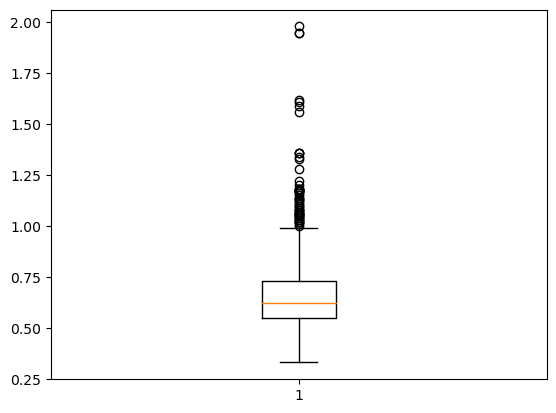

In [39]:
#checking for outliers in sulphates column
plt.boxplot(df["sulphates"])

In [40]:
#Removing a few extreme outliers in sulphates column
arr=[]
for i, row in df.iterrows():
    if row["sulphates"]>1.75:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape

(1571, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x2903f780ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2903f7811e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903f780a00>],
 'medians': [<matplotlib.lines.Line2D at 0x2903f781720>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903f7819c0>],
 'means': []}

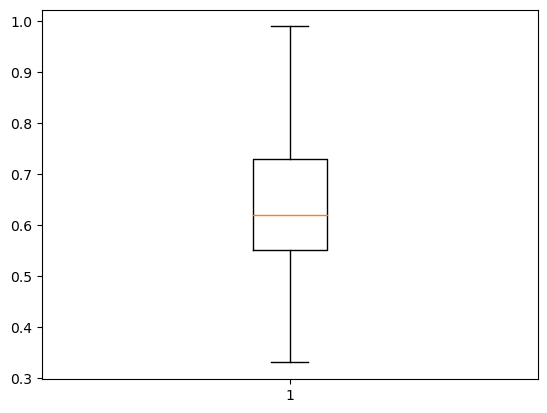

In [41]:
#winsorizing to handle outliers in sulphates column
winsorize(df["sulphates"],limits=[0,0.035],inplace=True)
plt.boxplot(df["sulphates"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2903ea88910>,
 'caps': [<matplotlib.lines.Line2D at 0x2903ea88d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2903ea88670>],
 'medians': [<matplotlib.lines.Line2D at 0x2903ea89270>],
 'fliers': [<matplotlib.lines.Line2D at 0x2903ea89510>],
 'means': []}

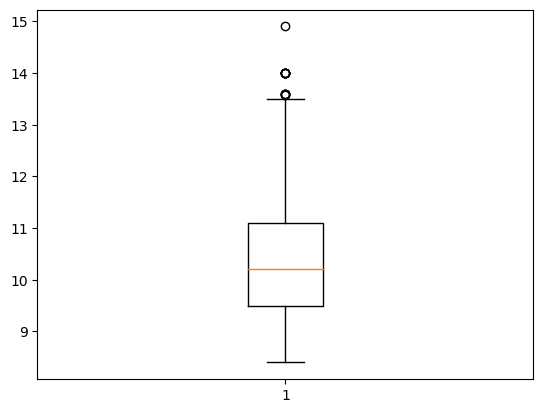

In [42]:
#checking for outliers in alcohol column
plt.boxplot(df["alcohol"])

In [43]:
#Removing a few extreme outliers in alcohol col
arr=[]
for i, row in df.iterrows():
    if row["alcohol"]>14:
        arr.append(i)
for i in arr:
    df.drop(i,inplace=True)
df.shape

(1570, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x29040de8490>,
 'caps': [<matplotlib.lines.Line2D at 0x29040de88b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29040de81c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29040de8df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29040de9090>],
 'means': []}

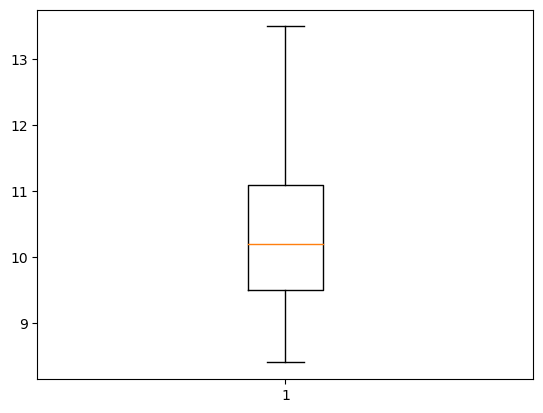

In [44]:
#winsorizing to handle outliers in alcohol column
winsorize(df["alcohol"],limits=[0,0.008],inplace=True)
plt.boxplot(df["alcohol"])

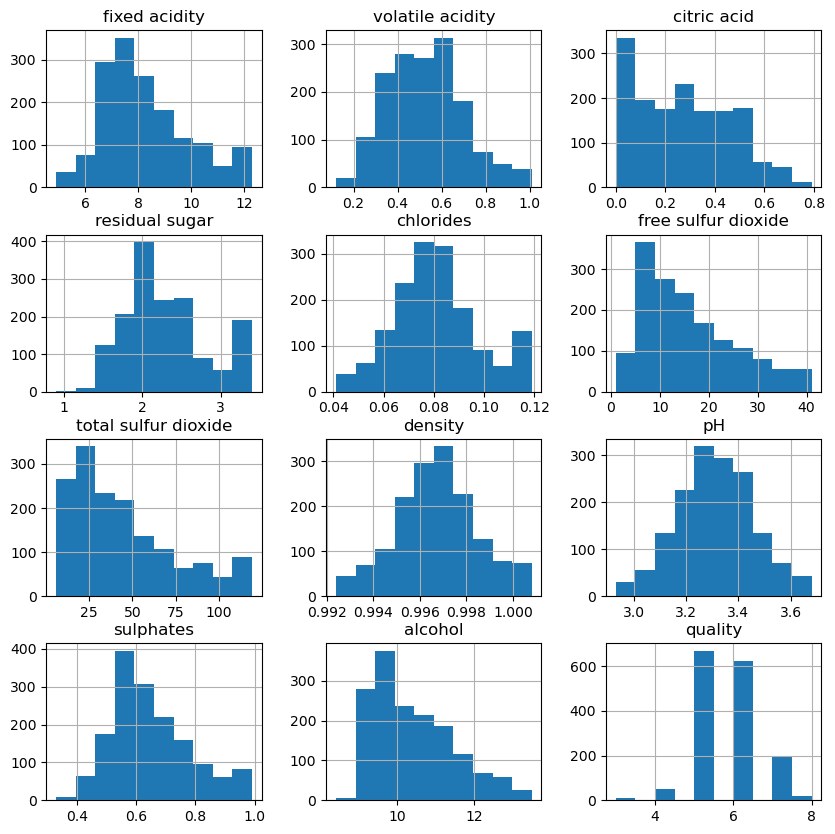

In [45]:
df.hist(figsize=(10,10))
plt.show()

In [49]:
df.rename(columns={'fixed acidity':'fixedAcidity','volatile acidity':'volatileAcidity','citric acid':'citricAcid','residual sugar':'residualSugar','total sulfur dioxide':'totalSulfurDioxide','free sulfur dioxide':'freeSulfurDioxide'},inplace=True)

In [50]:
x=df[df.columns[:11]]
y=df['quality']

In [51]:
#Applying multilinear regression model
train, test= train_test_split(df, test_size = 0.2)

In [53]:
train

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
1012,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,10.0,5
729,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,6
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
426,6.4,0.670,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6
882,8.4,0.310,0.29,3.1,0.119,14.0,26.0,0.99536,3.22,0.78,12.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1509,7.9,0.180,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5
1051,8.5,0.460,0.59,1.4,0.119,16.0,45.0,0.99702,3.03,0.99,9.2,5
1429,7.9,0.180,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5
1005,6.8,0.360,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7


In [70]:
ml1 = smf.ols('quality ~ fixedAcidity + volatileAcidity + citricAcid + chlorides + totalSulfurDioxide + density + pH + sulphates + alcohol', data = train).fit()

In [55]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     75.99
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.03e-121
Time:                        22:46:31   Log-Likelihood:                -1212.9
No. Observations:                1256   AIC:                             2448.
Df Residuals:                    1245   BIC:                             2504.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.6591     21.294      0.548      0.584     -30.117      53.436
fixedAcidity           0.0307      0.028      1.096      0.273      -0.024       0.086
volatileAcidity       -1.0318      0.137     -7.512      0.000      -1.301      -0.762
citricAcid            -0.3020      0.163     -1.853      0.064      -0.622       0.018
chlorides             -3.1682      1.181     -2.682      0.007      -5.486      -0.851
totalSulfurDioxide    -0.0032      0.001     -3.352      0.001      -0.005      -0.001
freeSulfurDioxide      0.0038      0.003      1.382      0.167      -0.002       0.009
density               -7.8141     21.769     -0.359      0.720     -50.523      34.895
pH                    -0.4094      0.209     -1.963      0.050      -0.818      -0.000
sulphates              1.2222      0.150      8.123      0.000       0.927       1.517
alcohol                0.2917      0.026     11.374      0.000       0.241       0.342
==============================================================================
Omnibus:                       12.546   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.130
Skew:                          -0.073   Prob(JB):                     0.000116
Kurtosis:                       3.570   Cond. No.                     9.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#train data prediction
train_pred = np.rint(ml1.predict(train)).astype(int)
train_pred

1012    5
729     6
3       6
426     6
882     6
       ..
1509    6
1051    6
1429    7
1005    6
1169    6
Length: 1256, dtype: int32

In [111]:
#train data accuracy
train_resid =train.quality-train_pred
# RMSE value for test data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
100-train_rmse

98.88303470735741

In [112]:
train_mse=np.mean(train_resid * train_resid)
train_mse

1.247611464968153

In [73]:
#test data prediction
test_pred = np.rint(ml1.predict(test)).astype(int)
test_pred

918     6
785     5
749     5
264     6
1330    5
       ..
1507    6
1062    6
404     5
1095    6
52      5
Length: 314, dtype: int32

In [74]:
#test data accuracy
test_resid =test.quality-test_pred
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
100-test_rmse

99.31345970284488

In [113]:
test_mse=np.mean(test_resid * test_resid)
test_mse

0.7515923566878981

In [116]:
r=ml1.rsquared
r

0.378078554297387

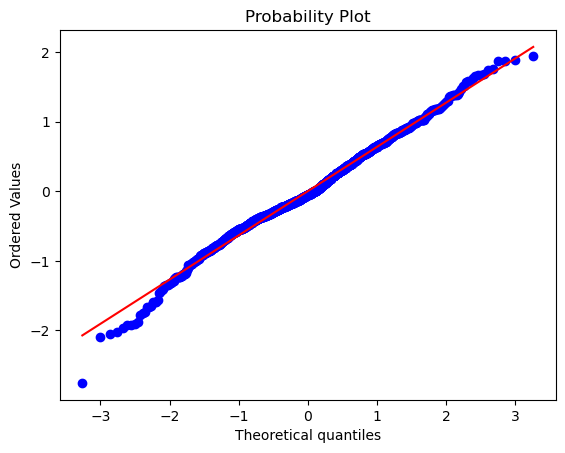

In [69]:
res = ml1.resid
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

In [82]:
df.describe()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,8.298217,0.527019,0.269159,2.287962,0.081011,15.486624,44.875159,0.996727,3.311516,0.648369,10.418970,5.638854
std,1.643112,0.174419,0.192658,0.546043,0.017326,9.627634,29.609881,0.001757,0.146782,0.134920,1.044301,0.807955
min,4.900000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992400,2.930000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,37.000000,0.996720,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,12.300000,1.010000,0.790000,3.400000,0.119000,41.000000,119.000000,1.000800,3.680000,0.990000,13.500000,8.000000


In [76]:
#Using decision trees
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2)

In [87]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [105]:
ml2=DecisionTreeRegressor(random_state = 0).fit(x_train,y_train) 

In [95]:
#train data prediction
train_pred = np.rint(ml2.predict(x_train)).astype(int)
train_pred

array([5, 5, 6, ..., 6, 6, 6])

In [96]:
#train data accuracy
train_resid =y_train-train_pred
# RMSE value for test data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
100-train_rmse

100.0

In [97]:
#test data prediction
test_pred = np.rint(ml2.predict(x_test)).astype(int)
test_pred

array([6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 7, 6, 6, 5, 4,
       5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 6, 6, 5, 5, 4, 5, 8, 7, 6, 6, 5, 5,
       5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 4, 6, 6, 5, 6, 7, 6, 4, 6, 6,
       6, 8, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6,
       6, 7, 5, 5, 6, 5, 7, 7, 5, 6, 8, 6, 5, 6, 5, 5, 7, 5, 7, 7, 6, 5,
       4, 5, 6, 5, 7, 7, 6, 8, 5, 6, 6, 3, 7, 6, 5, 5, 5, 7, 6, 5, 5, 5,
       4, 5, 6, 7, 7, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 7, 6, 4, 5, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 3, 6, 5, 7, 5, 6, 5, 4, 6, 8, 5, 3, 4,
       5, 6, 6, 5, 8, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 8, 7, 6, 5,
       6, 4, 5, 5, 7, 5, 6, 5, 8, 4, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       6, 7, 7, 5, 7, 7, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 5, 5, 7, 6, 7, 5, 6, 6, 6, 7, 4, 6, 4, 7, 7, 5, 5, 7, 6,
       6, 6, 7, 6, 6, 4, 5, 7, 6, 6, 5, 7, 7, 5, 5, 5, 4, 6, 5, 5, 5, 4,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5,

In [98]:
#test data accuracy
test_resid =y_test-test_pred
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
100-test_rmse

99.13305573611224

In [99]:
#using random forest
ml3=RandomForestRegressor(n_estimators=50,random_state=0).fit(x_train,y_train)

In [100]:
#train data prediction
train_pred = np.rint(ml2.predict(x_train)).astype(int)
train_pred

array([5, 5, 6, ..., 6, 6, 6])

In [101]:
#train data accuracy
train_resid =y_train-train_pred
# RMSE value for test data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
100-train_rmse

100.0

In [102]:
#test data prediction
test_pred = np.rint(ml2.predict(x_test)).astype(int)
test_pred

array([6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 7, 6, 6, 5, 4,
       5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 6, 6, 5, 5, 4, 5, 8, 7, 6, 6, 5, 5,
       5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 4, 6, 6, 5, 6, 7, 6, 4, 6, 6,
       6, 8, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6,
       6, 7, 5, 5, 6, 5, 7, 7, 5, 6, 8, 6, 5, 6, 5, 5, 7, 5, 7, 7, 6, 5,
       4, 5, 6, 5, 7, 7, 6, 8, 5, 6, 6, 3, 7, 6, 5, 5, 5, 7, 6, 5, 5, 5,
       4, 5, 6, 7, 7, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 7, 6, 4, 5, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 3, 6, 5, 7, 5, 6, 5, 4, 6, 8, 5, 3, 4,
       5, 6, 6, 5, 8, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 8, 7, 6, 5,
       6, 4, 5, 5, 7, 5, 6, 5, 8, 4, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       6, 7, 7, 5, 7, 7, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 5, 5, 7, 6, 7, 5, 6, 6, 6, 7, 4, 6, 4, 7, 7, 5, 5, 7, 6,
       6, 6, 7, 6, 6, 4, 5, 7, 6, 6, 5, 7, 7, 5, 5, 5, 4, 6, 5, 5, 5, 4,
       6, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5,

In [103]:
#test data accuracy
test_resid =y_test-test_pred
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
100-test_rmse

99.13305573611224

In [107]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)